# DSC 40B: Quick Select & Quick Sort

### By: Daniel Lee & Udaikaran Singh

In [1]:
#imports
import ipywidgets as widgets
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from SortHelper import DisplayResults

## Quick Select Code

In [2]:
def quickselect(l, k, pivot_fn):
    if len(l) == 1:
        assert k == 0
        return l[0]

    pivot = pivot_fn(l)

    lows = [el for el in l if el < pivot]
    highs = [el for el in l if el > pivot]
    pivots = [el for el in l if el == pivot]

    if k < len(lows):
        return quickselect(lows, k, pivot_fn)
    elif k < len(lows) + len(pivots):
        # We found our median
        return pivots[0]
    else:
        #Note: we changed our k value, because we are ignoring the values below our pivot
        return quickselect(highs, k - len(lows) - len(pivots), pivot_fn)

In [3]:
def quickselect_median(l, pivot_fn=random.choice):
    if len(l) % 2 == 1:
        return quickselect(l, len(l) / 2, pivot_fn)
    else:
        return 0.5 * (quickselect(l, len(l) / 2 - 1, pivot_fn) +
                      quickselect(l, len(l) / 2, pivot_fn))

In [4]:
a = [1,3,3,4,5]
quickselect_median(a)

3

## Quick Sort Code

In [5]:
def partition(array , low , high):
    i = low - 1
    pivot = array[high]
    
    for j in range( low , high):
        
        if array[j] <= pivot:
            
            i += 1
            array[i],array[j] = array[j],array[i] # Swapping 
    
    array[i+1],array[high] = array[high],array[i+1] 
    return(i+1)

def QuickSort(array,low,high, pivot_function = random.randint):
    if low < high:
        random_value = pivot_function(low,high)
        
        array[random_value] , array[high] = array[high], array[random_value] 
        
        mid = partition(array,low,high)
        QuickSort(array,low,mid-1)
        QuickSort(array,mid+1,high)

In [6]:
a = [1, 3, 2, 5, 7, 6, 8, 9, 4]
QuickSort(array= a, low= 0, high= len(a)-1)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Average Performance vs. Worst Case

In [7]:
results = []
for _ in range(1000):
    randomList = np.random.randint(1000, size = 1000)
    start = time.time()
    QuickSort(randomList, 0, len(randomList)-1)
    end = time.time()
    results.append(end - start)
    
sameVal = [1] * 1000
start = time.time()
QuickSort(sameVal, 0, len(sameVal) - 1)
end = time.time()
worstCase = end - start

### Runtime Distribution

Average Runtime:  0.00626203465461731


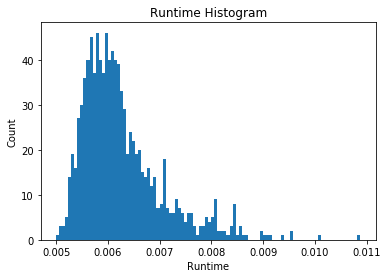

In [8]:
ax = plt.hist(results, bins = 100)
plt.title("Runtime Histogram")
plt.xlabel("Runtime")
plt.ylabel("Count")
print("Average Runtime: ", np.mean(results))

### Worst Case

Average Runtime:  0.00626203465461731
Worst Case Runtime:  0.10414409637451172
This is 16x worse.


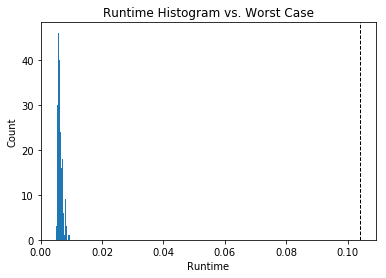

In [9]:
ax = plt.hist(results, bins = 100)
plt.title("Runtime Histogram vs. Worst Case")
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.axvline(worstCase, color='k', linestyle='dashed', linewidth=1)
print("Average Runtime: ", np.mean(results))
print("Worst Case Runtime: ", worstCase)
print("This is " + str(int(worstCase/np.mean(results))) + "x worse.")

## Performance on Different Inputs

In [10]:
finResults = []
results = []
n = 100
iterations = 5000

for _ in range(iterations):
    randomList = np.random.randint(1000, size = n)
    start = time.time()
    QuickSort(randomList, 0, len(randomList)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

results = []
for _ in range(iterations):
    [1] * n
    start = time.time()
    QuickSort(randomList, 0, len(randomList)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

results = []
for _ in range(iterations):
    lst = list(range(n))
    start = time.time()
    QuickSort(lst, 0, len(lst)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

results = []
half = int((n/2))
for _ in range(iterations):
    lst = list(range(half)) + np.random.randint(1000, size = half)
    start = time.time()
    QuickSort(lst, 0, len(lst)-1)
    end = time.time()
    delta = end-start
    results.append(delta)

finResults.append(results)

<Figure size 2560x1920 with 0 Axes>

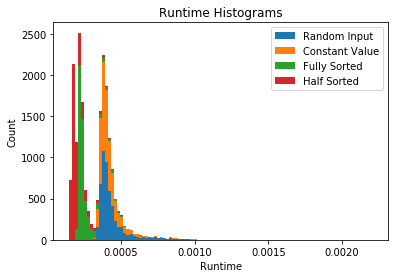

<Figure size 2560x1920 with 0 Axes>

In [11]:
labels = ['Random Input', "Constant Value", "Fully Sorted", "Half Sorted"]
ax = plt.hist(finResults, bins = 100, label = labels, stacked=True)
plt.legend()
plt.title("Runtime Histograms")
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')

## Partitioning Methods

In [12]:
FirstMethod = widgets.Dropdown(
    options=['Last Element', 'Random', "Median of Three"],
    value='Random',
    description='First:',
)
SecondMethod = widgets.Dropdown(
    options=['Last Element', 'Random', "Median of Three"],
    value='Random',
    description='Second:',
)
Input_type = widgets.Dropdown(
    options=['Random', 'Sorted','First Half Sorted', "Partially Sorted"],
    value='Random',
    description='Third:',
)

print("Pick 2 Methods for Partitioning:")
display(FirstMethod)
display(SecondMethod)
print("Pick an Input Type:")
display(Input_type)
print("And then Run the Next Cell")

Pick 2 Methods for Partitioning:


Dropdown(description='First:', index=1, options=('Last Element', 'Random', 'Median of Three'), value='Random')

Dropdown(description='Second:', index=1, options=('Last Element', 'Random', 'Median of Three'), value='Random'…

Pick an Input Type:


Dropdown(description='Third:', options=('Random', 'Sorted', 'First Half Sorted', 'Partially Sorted'), value='R…

And then Run the Next Cell


Mean of Random Method:  0.0004673709869384766
Mean of Random Method:  0.0004567394256591797


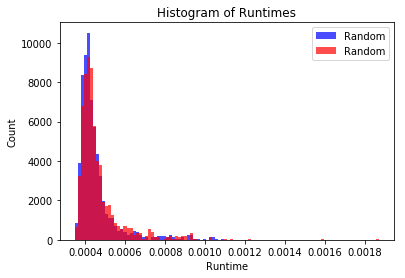

<Figure size 576x432 with 0 Axes>

In [13]:
ax, firstMean, secondMean = DisplayResults(FirstMethod.value, SecondMethod.value, Input_type.value)
print("Mean of " + FirstMethod.value +" Method: ", firstMean)
print("Mean of " + SecondMethod.value + " Method: ", secondMean)

## Assessment Questions